# Image Classification with Tensorflow

## Phase 1: Environment Setup

Import the necessary libraries

In [63]:
# import keras libraries and packages
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as po

Retrieve the raw data set

In [64]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [65]:
PATH

'/Users/patrickbenitez/.keras/datasets/cats_and_dogs_filtered'

Set the training and validation paths

In [66]:
train_nike_dir = 'data/train/nike_train' # directory with our training cat pictures
train_adidas_dir = 'data/train/adidas_train'
validation_nike_dir = 'data/validate/nike_test'
validation_adidas_dir = 'data/validate/adidas_test'

In [67]:
num_nike_tr = len(os.listdir(train_nike_dir))
num_adidas_tr = len(os.listdir(train_adidas_dir))

num_nike_val = len(os.listdir(validation_nike_dir))
num_adidas_val = len(os.listdir(validation_adidas_dir))

total_train = num_nike_tr + num_adidas_tr
total_val = num_nike_val + num_adidas_val

In [68]:
print('total training Nike images:', num_nike_tr)
print('total training Adidas images:', num_adidas_tr)

print('total validation Nike images:', num_nike_val)
print('total validation Adidas images:', num_adidas_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Nike images: 268
total training Adidas images: 146
total validation Nike images: 182
total validation Adidas images: 137
--
Total training images: 414
Total validation images: 319


Set the global variables

In [69]:
train_dir = 'data/train'
validation_dir = 'data/validate'
unique_dir = 'data/validate/unique'

In [104]:
batch_size = 16
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

## Phase 2: Data Preparation

- Read images from desk
- Convert grid coordinates to the RGB content
- Convert each file to floating point tensors
- Rescale tensors between 0 and 255 between 0 and 1

In [71]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
unique_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

- load images from the desk
- apply rescaling
- resize images into the required dimensions

In [72]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 407 images belonging to 2 classes.


In [73]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 316 images belonging to 3 classes.


### Visualize the training images

In [74]:
sample_training_images, _ = next(train_data_gen)

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



In [75]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

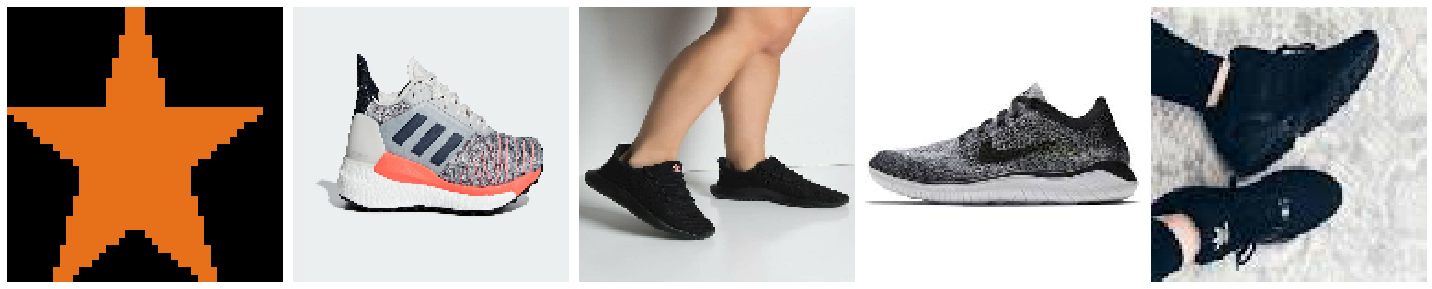

In [76]:
plotImages(sample_training_images[:5])

Create the model

In [77]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

Compile the model

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

Train the model

In [80]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 13 steps
Epoch 1/50
 3/17 [====>.........................] - ETA: 5s - loss: 2.0254 - accuracy: 0.6389

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



17/17 [==============================] - 7s 407ms/step - loss: 0.9325 - accuracy: 0.4988 - val_loss: 0.6728 - val_accuracy: 0.4263
Epoch 2/50
17/17 [==============================] - 6s 350ms/step - loss: 0.6556 - accuracy: 0.5848 - val_loss: 0.6532 - val_accuracy: 0.6538
Epoch 3/50
17/17 [==============================] - 6s 349ms/step - loss: 0.6156 - accuracy: 0.6192 - val_loss: 0.6294 - val_accuracy: 0.6506
Epoch 4/50
17/17 [==============================] - 6s 359ms/step - loss: 0.5762 - accuracy: 0.6536 - val_loss: 0.6222 - val_accuracy: 0.6763
Epoch 5/50
17/17 [==============================] - 6s 365ms/step - loss: 0.5302 - accuracy: 0.6929 - val_loss: 0.5309 - val_accuracy: 0.7276
Epoch 6/50
17/17 [==============================] - 6s 351ms/step - loss: 0.4689 - accuracy: 0.7297 - val_loss: 0.5162 - val_accuracy: 0.7340
Epoch 7/50
17/17 [==============================] - 6s 342ms/step - loss: 0.4187 - accuracy: 0.7518 - val_loss: 0.5175 - val_accuracy: 0.7404
Epoch 8/50
17/17 

Visualize the training results

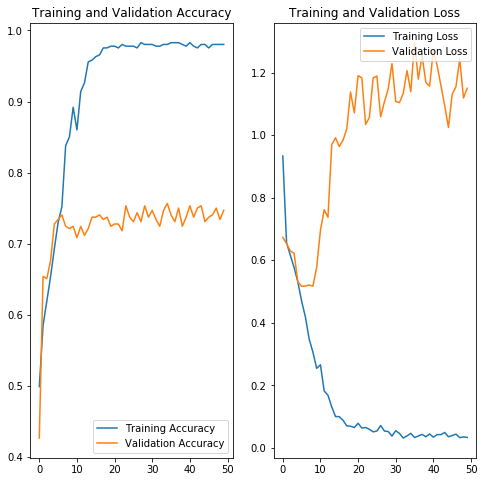

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data Augmentation 

- augment data files to in order to address overfitting for small data set
- apply horizontal flip, copy multiple pictures, rotate images, and zoom in

In [82]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [83]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 407 images belonging to 2 classes.


In [84]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

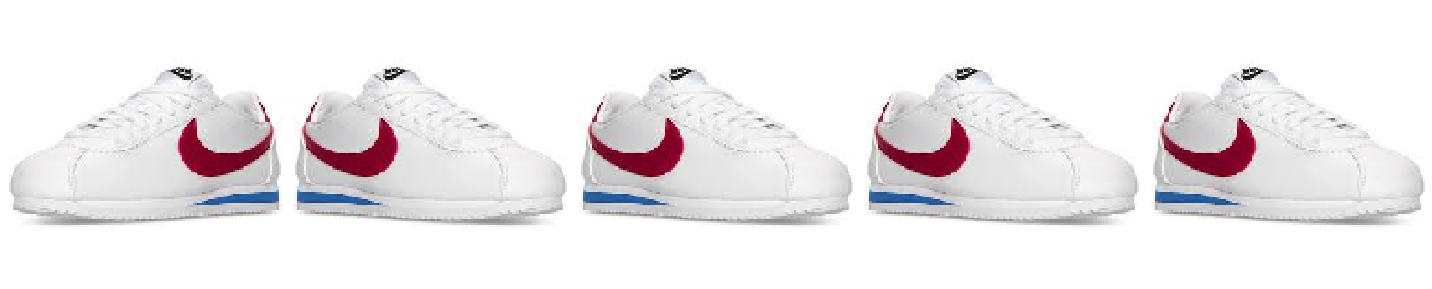

In [85]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [86]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [87]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 407 images belonging to 2 classes.


In [88]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

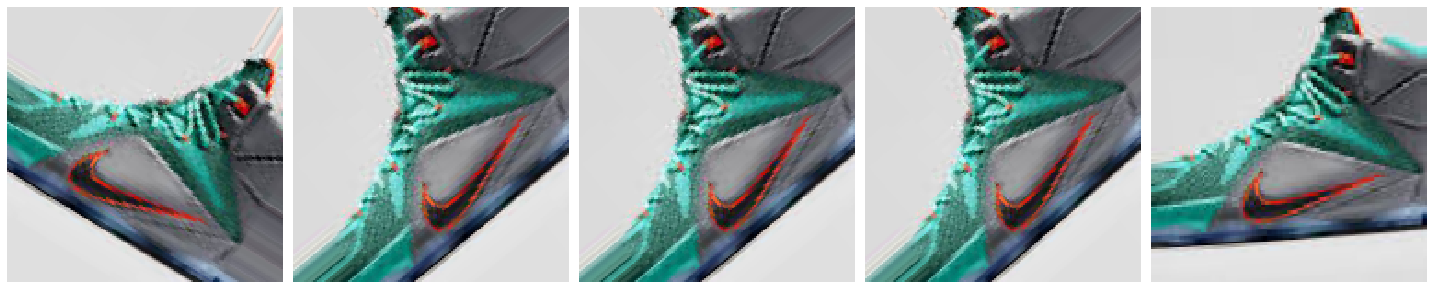

In [89]:
plotImages(augmented_images)

### Apply Zoom Aughmentation

In [90]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [91]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 407 images belonging to 2 classes.


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



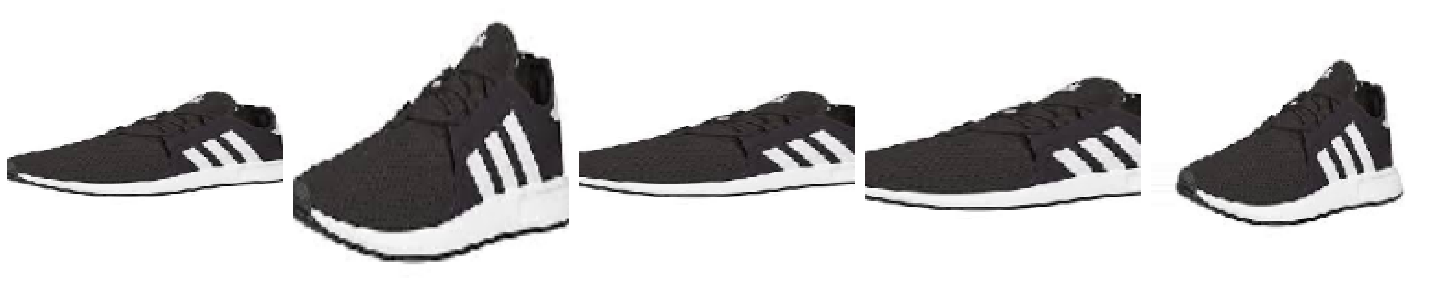

In [92]:
plotImages(augmented_images)

## Compile and create validation data generator

In [93]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [94]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 407 images belonging to 2 classes.


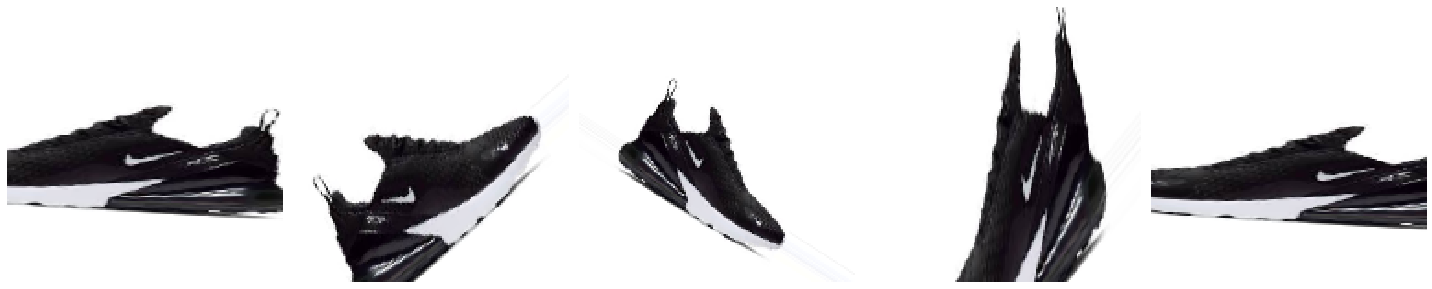

In [95]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [96]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [97]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 316 images belonging to 3 classes.


## Create the Dropouts

Create a new network with dropouts

In [98]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [99]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)       

In [100]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 17 steps, validate for 13 steps
Epoch 1/50
 2/17 [==>...........................] - ETA: 9s - loss: 2.3737 - accuracy: 0.5417 

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



17/17 [==============================] - 8s 495ms/step - loss: 0.9585 - accuracy: 0.4349 - val_loss: 0.6842 - val_accuracy: 0.5865
Epoch 2/50
17/17 [==============================] - 8s 476ms/step - loss: 0.6313 - accuracy: 0.6241 - val_loss: 0.6712 - val_accuracy: 0.6218
Epoch 3/50
17/17 [==============================] - 8s 466ms/step - loss: 0.6280 - accuracy: 0.6511 - val_loss: 0.6798 - val_accuracy: 0.6282
Epoch 4/50
17/17 [==============================] - 8s 445ms/step - loss: 0.6251 - accuracy: 0.5774 - val_loss: 0.6621 - val_accuracy: 0.6346
Epoch 5/50
17/17 [==============================] - 8s 466ms/step - loss: 0.6069 - accuracy: 0.6388 - val_loss: 0.6357 - val_accuracy: 0.6859
Epoch 6/50
17/17 [==============================] - 8s 469ms/step - loss: 0.6087 - accuracy: 0.6093 - val_loss: 0.6509 - val_accuracy: 0.6603
Epoch 7/50
17/17 [==============================] - 8s 464ms/step - loss: 0.6118 - accuracy: 0.6536 - val_loss: 0.6370 - val_accuracy: 0.6571
Epoch 8/50
17/17 

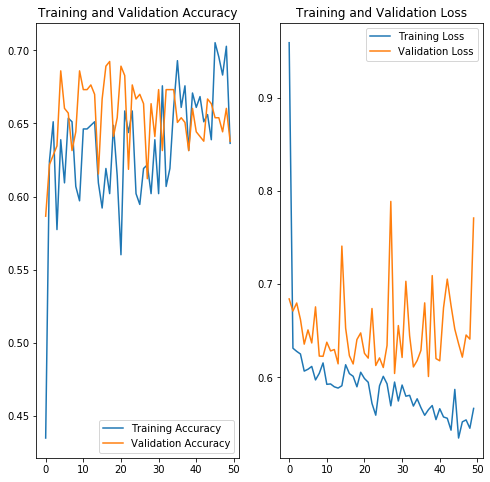

In [101]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## PREDICT

In [109]:
from keras.preprocessing import image
from keras.models import load_model


x = image.load_img('data/validate/unique/a-skate.jpg', target_size=(150,150))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

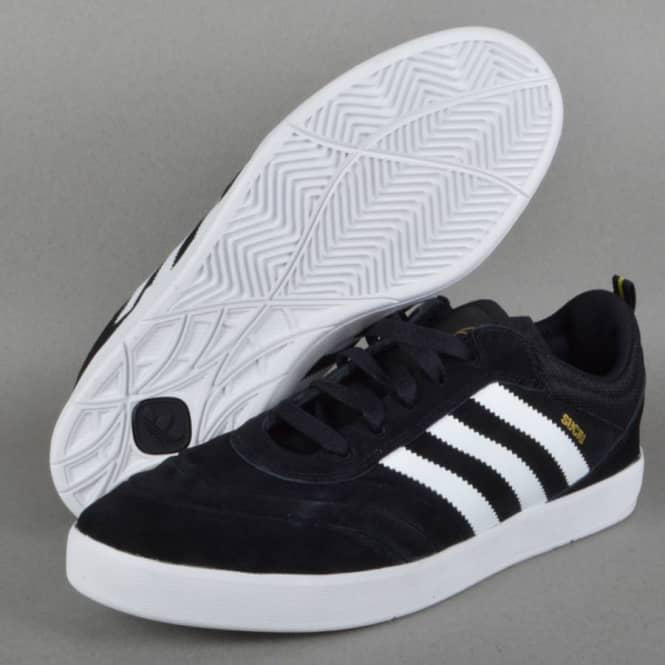

In [110]:
nike_test = PIL.Image.open('data/validate/unique/a-skate.jpg')
nike_test

In [111]:
img_class = model.predict_classes(x)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  [0]
